In [1]:
import os, cv2, glob, random, math, time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import segmentation_models as sm
from tensorflow.keras.utils import normalize
from sklearn.preprocessing import LabelEncoder
from numpy import asarray, clip
from keras.models import Model, Sequential, load_model
from keras.models import load_model

Segmentation Models: using `keras` framework.


In [2]:
s = 512
img = cv2.imread('data/primer/trainRGB/DJI_7.jpg')
#mask2 = cv2.imread('data/primer/primeruji/label/l_3.png')

(1, 512, 512, 3)


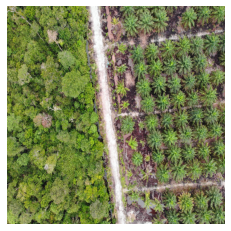

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (s,s))
plt.imshow(img)
plt.axis('off')

img_array= np.expand_dims(img, axis=0)
img_array =img_array.astype('float32')/255.0  
print(img_array.shape)


(1, 512, 512, 3)


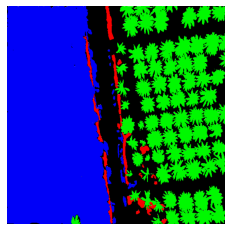

In [4]:
#.... mask
mask = cv2.imread('data/primer/maskRGB/m7.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
mask1 = cv2.resize(mask,(s,s))
plt.imshow(mask1, cmap='gray')
plt.axis('off')

mask1 = np.expand_dims(mask1, axis=0)
mask1 = mask1/255.0     #.astype('float32')
print(mask1.shape)


In [5]:
input_shape = (img_array.shape[1],img_array.shape[2], img_array.shape[3])
print(input_shape)

(512, 512, 3)


In [6]:
sm.set_framework('tf.keras')
sm.framework()

#Refer Keras
BACKBONE1 = 'vgg16'
preprocess_input = sm.get_preprocessing(BACKBONE1)
model1 = sm.Unet(BACKBONE1,input_shape=input_shape, encoder_weights=None, classes=3,
                activation='softmax', decoder_block_type = 'upsampling')
model1.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics =(['accuracy'],[tf.keras.metrics.Precision()],[tf.keras.metrics.Recall()]))

BACKBONE2 = 'vgg19'
preprocess_input = sm.get_preprocessing(BACKBONE2)
model2 = sm.Unet(BACKBONE2,input_shape=input_shape, encoder_weights=None,
                 classes=3, activation='softmax', decoder_block_type = 'upsampling')
model2.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics =(['accuracy'],[tf.keras.metrics.Precision()],[tf.keras.metrics.Recall()]))


In [7]:
# FCN 8 ===== Long, 2015
# model3 = load_model('data/model_save/FCN8_RGB.hdfs', compile=False)
model3 = load_model('data/model_save/FCN8_RGB.hdfs', compile=False)
model3.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics =(['accuracy'],[tf.keras.metrics.Precision()],[tf.keras.metrics.Recall()]))

In [8]:
#Segnet biasa Badriayanan
# model4 = load_model('data/model_save/Segnet_RGB.hdfs', compile=False)
model4 = load_model('data/model_save/Segnet_RGB.hdfs', compile=False)
model4.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics =(['accuracy'],[tf.keras.metrics.Precision()],[tf.keras.metrics.Recall()]))

In [9]:
#AtrousDenseUDeconvNet
# model5 = load_model('data/model_save/M_ADUDN_RGB.hdfs', compile=False)
model5 = load_model('data/model_save/M_ADUDN_RGB.hdfs', compile=False)
model5.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics =(['accuracy'],[tf.keras.metrics.Precision()],[tf.keras.metrics.Recall()]))

In [10]:
BACKBONE6 = 'resnet101'
preprocess_input = sm.get_preprocessing(BACKBONE6)

model6 = sm.Unet(BACKBONE6,input_shape=input_shape, encoder_weights=None,
                classes=3,activation='softmax', decoder_block_type = 'upsampling')
model6.compile(optimizer='adam', loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics =(['accuracy'],[tf.keras.metrics.Precision()],[tf.keras.metrics.Recall()]))

In [11]:
# Purpose Model Tuning Parameter
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# cp1 = 'training/cpVGG19_Baru+3RGB_PB512.ckpt'

# model7 = load_model('data/model_save/MVGG19_Baru+3RGB_PB.hdfs', compile=False)
# model7 = load_model('data/model_save/MVGG19_Baru+3RGB3_512.hdfs', compile=False)
model7 = load_model('data/model_save/MVGG19_Baru+3RGB_1.hdfs', compile=False)

# cpr1 = tf.train.Checkpoint(model=model7)
# cpr1.restore(cp1).expect_partial()

# model7 = load_model('data/model_save/MVGG19_Baru+3RGB_PB.hdfs', compile=False)
model7.compile(optimizer='Adam', loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics =(['accuracy'],[tf.keras.metrics.Precision()],[tf.keras.metrics.Recall()]))


In [12]:
model7.summary()

Model: "M1-VGG-19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_186 (Conv2D)             (None, 512, 512, 32) 896         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_156 (BatchN (None, 512, 512, 32) 128         conv2d_186[0][0]                 
__________________________________________________________________________________________________
activation_144 (Activation)     (None, 512, 512, 32) 0           batch_normalization_156[0][0]    
__________________________________________________________________________________________

In [13]:
# Purpose Model Add Residu Fungtion
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# cp2 = 'training/cpVGG19_Baru+R3RGB_PB512.ckpt'

# model8 = load_model('data/model_save/MVGG19_Baru+R3RGB_PB.hdfs', compile=False)
# model8 = load_model('data/model_save/MVGG19_Baru+R3RGB3_512.hdfs', compile=False)
model8 = load_model('data/model_save/MVGG19_Baru+R3RGB_1.hdfs', compile=False)

# cpr2 = tf.train.Checkpoint(model=model8)
# cpr2.restore(cp2).expect_partial()

# model8 = load_model('data/model_save/MVGG19_Baru+R3FRGB_512.hdfs', compile=False)
model8.compile(optimizer='Adam', loss = tf.keras.losses.CategoricalCrossentropy(),
               metrics =(['accuracy'],[tf.keras.metrics.Precision()],[tf.keras.metrics.Recall()]))


In [14]:
model8.summary()

Model: "M1-VGG-19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_68 (Conv2D)              (None, 512, 512, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_54 (BatchNo (None, 512, 512, 32) 128         conv2d_68[0][0]                  
__________________________________________________________________________________________________
activation_48 (Activation)      (None, 512, 512, 32) 0           batch_normalization_54[0][0]     
__________________________________________________________________________________________

### =======TRAINING PROGRAM =====

In [15]:
start1 = time.time()
hit1 = model1.fit(img_array, mask1, epochs=30, shuffle=False)
# hit1 = model1.fit(img_array, img_array, epochs=30, shuffle=False)
print("Total time: ", time.time() - start1, "seconds")

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.7304 - accuracy: 0.3981 - precision: 0.4107 - recall: 0.2943
Epoch 2/30
1/1 [==============================] - 3s 3s/step - loss: 0.6047 - accuracy: 0.4758 - precision: 0.5953 - recall: 0.3740
Epoch 3/30
1/1 [==============================] - 3s 3s/step - loss: 0.4880 - accuracy: 0.5906 - precision: 0.7246 - recall: 0.5144
Epoch 4/30
1/1 [==============================] - 3s 3s/step - loss: 0.5100 - accuracy: 0.5864 - precision: 0.6983 - recall: 0.4713
Epoch 5/30
1/1 [==============================] - 3s 3s/step - loss: 0.3878 - accuracy: 0.6413 - precision: 0.7777 - recall: 0.6582
Epoch 6/30
1/1 [==============================] - 3s 3s/step - loss: 0.3250 - accuracy: 0.7349 - precision: 0.8180 - recall: 0.7515
Epoch 7/30
1/1 [==============================] - 3s 3s/step - loss: 0.2906 - accuracy: 0.7536 - precision: 0.8058 - recall: 0.8042
Epoch 8/30
1/1 [==============================] - 3s 3s/step - loss: 0.2670 

In [16]:
start2 = time.time()
hit2 = model2.fit(img_array, mask1, epochs=30, shuffle=False)
# hit2 = model2.fit(img_array, img_array, epochs=30, shuffle=False)
print("Total time: ", time.time() - start2, "seconds")

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.9656 - accuracy: 0.2917 - precision_1: 0.1958 - recall_1: 0.1319
Epoch 2/30
1/1 [==============================] - 3s 3s/step - loss: 0.8455 - accuracy: 0.3458 - precision_1: 0.2515 - recall_1: 0.1231
Epoch 3/30
1/1 [==============================] - 3s 3s/step - loss: 0.7983 - accuracy: 0.2856 - precision_1: 0.1978 - recall_1: 0.0718
Epoch 4/30
1/1 [==============================] - 3s 3s/step - loss: 0.6778 - accuracy: 0.4545 - precision_1: 0.3597 - recall_1: 0.0982
Epoch 5/30
1/1 [==============================] - 3s 3s/step - loss: 0.6252 - accuracy: 0.6141 - precision_1: 0.5643 - recall_1: 0.1236
Epoch 6/30
1/1 [==============================] - 3s 3s/step - loss: 0.5722 - accuracy: 0.6931 - precision_1: 0.5588 - recall_1: 0.1857
Epoch 7/30
1/1 [==============================] - 3s 3s/step - loss: 0.5172 - accuracy: 0.7139 - precision_1: 0.6255 - recall_1: 0.3237
Epoch 8/30
1/1 [==============================] 

In [17]:
start3 = time.time()
hit3 = model3.fit(img_array, mask1, epochs=30, shuffle=False)
# hit3 = model3.fit(img_array, img_array, epochs=30, shuffle=False)
print("Total time: ", time.time() - start3, "seconds")

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.7522 - accuracy: 0.3191 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 1s 679ms/step - loss: 0.7409 - accuracy: 0.3281 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 1s 617ms/step - loss: 0.7310 - accuracy: 0.3446 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 1s 598ms/step - loss: 0.7217 - accuracy: 0.3606 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 1s 646ms/step - loss: 0.7127 - accuracy: 0.3814 - precision_2: 0.0279 - recall_2: 8.7806e-04
Epoch 6/30
1/1 [==============================] - 1s 580ms/step - loss: 0.7035 - accuracy: 0.3814 - precision_2: 0.1608 - recall_2: 0.0150
Epoch 7/30
1/1 [==============================] - 1s 585ms/step - loss: 0.6946 - accuracy: 0.3813 - precision_2: 0.3201 - recall_2: 0

In [18]:
start4 = time.time()
hit4 = model4.fit(img_array,mask1, epochs=30, shuffle=False)
# hit4 = model4.fit(img_array,img_array, epochs=30, shuffle=False)
print("Total time: ", time.time() - start4, "seconds")

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.8139 - accuracy: 0.3255 - precision_3: 0.2919 - recall_3: 0.2658
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 0.3306 - accuracy: 0.7403 - precision_3: 0.6395 - recall_3: 0.8001
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 0.3127 - accuracy: 0.7356 - precision_3: 0.6735 - recall_3: 0.7742
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 0.2520 - accuracy: 0.7063 - precision_3: 0.7439 - recall_3: 0.8317
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 0.2074 - accuracy: 0.7042 - precision_3: 0.7476 - recall_3: 0.8686
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 0.1928 - accuracy: 0.6502 - precision_3: 0.8303 - recall_3: 0.8774
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 0.1787 - accuracy: 0.6833 - precision_3: 0.8605 - recall_3: 0.8728
Epoch 8/30
1/1 [==============================] 

In [19]:
start5 = time.time()
hit5 = model5.fit(img_array, mask1, epochs=30, shuffle=False)
# hit5 = model5.fit(img_array, img_array, epochs=30, shuffle=False)
print("Total time: ", time.time() - start5, "seconds")

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 1.1138 - accuracy: 0.3162 - precision_4: 0.0512 - recall_4: 0.0361
Epoch 2/30
1/1 [==============================] - 3s 3s/step - loss: 342.4170 - accuracy: 0.4218 - precision_4: 0.4288 - recall_4: 0.5946
Epoch 3/30
1/1 [==============================] - 3s 3s/step - loss: 0.6006 - accuracy: 0.4219 - precision_4: 0.4288 - recall_4: 0.5872
Epoch 4/30
1/1 [==============================] - 3s 3s/step - loss: 0.5966 - accuracy: 0.4313 - precision_4: 0.7754 - recall_4: 0.3251
Epoch 5/30
1/1 [==============================] - 3s 3s/step - loss: 1.1801 - accuracy: 0.3643 - precision_4: 0.0600 - recall_4: 0.0244
Epoch 6/30
1/1 [==============================] - 3s 3s/step - loss: 1.1597 - accuracy: 0.3716 - precision_4: 0.0545 - recall_4: 0.0367
Epoch 7/30
1/1 [==============================] - 3s 3s/step - loss: 0.7387 - accuracy: 0.5062 - precision_4: 0.2319 - recall_4: 0.1804
Epoch 8/30
1/1 [==============================

In [20]:
start6 = time.time()
hit6 = model6.fit(img_array,mask1, epochs=30, shuffle=False)
# hit6 = model6.fit(img_array, img_array, epochs=30, shuffle=False)
print("Total time: ", time.time() - start6, "seconds")

Epoch 1/30
1/1 [==============================] - 12s 12s/step - loss: 0.6583 - accuracy: 0.3884 - precision_5: 0.3727 - recall_5: 0.3291
Epoch 2/30
1/1 [==============================] - 3s 3s/step - loss: 0.5022 - accuracy: 0.5113 - precision_5: 0.6027 - recall_5: 0.5164
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 0.3824 - accuracy: 0.6031 - precision_5: 0.7857 - recall_5: 0.6809
Epoch 4/30
1/1 [==============================] - 3s 3s/step - loss: 0.3088 - accuracy: 0.6506 - precision_5: 0.8585 - recall_5: 0.7879
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 0.2576 - accuracy: 0.6694 - precision_5: 0.8889 - recall_5: 0.8453
Epoch 6/30
1/1 [==============================] - 2s 2s/step - loss: 0.2201 - accuracy: 0.6748 - precision_5: 0.8960 - recall_5: 0.8736
Epoch 7/30
1/1 [==============================] - 3s 3s/step - loss: 0.1978 - accuracy: 0.6755 - precision_5: 0.9064 - recall_5: 0.8799
Epoch 8/30
1/1 [==============================

In [44]:
cp1 = 'training/cpVGG19_Baru+3RGB_3B3512.ckpt'
cpd1 = os.path.dirname(cp1)
cpc1 = tf.keras.callbacks.ModelCheckpoint(filepath=cp1, save_weights_only = True, verbose=1, monitor='recall_6', mode=max)

start7 = time.time()
hit7 = model7.fit(img_array,mask1, epochs=30, shuffle=False)
# hit7 = model7.fit(img_array, img_array, epochs=30, shuffle=False)
print("Total time: ", time.time() - start7, "seconds")

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6184 - accuracy: 0.8669 - precision_6: 0.8513 - recall_6: 0.9064
Epoch 2/30
1/1 [==============================] - 1s 1s/step - loss: 0.6056 - accuracy: 0.8676 - precision_6: 0.8514 - recall_6: 0.9089
Epoch 3/30
1/1 [==============================] - 1s 1s/step - loss: 0.5948 - accuracy: 0.8690 - precision_6: 0.8577 - recall_6: 0.9064
Epoch 4/30
1/1 [==============================] - 1s 1s/step - loss: 0.5828 - accuracy: 0.8713 - precision_6: 0.8612 - recall_6: 0.9059
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 0.5729 - accuracy: 0.8726 - precision_6: 0.8697 - recall_6: 0.9035
Epoch 6/30
1/1 [==============================] - 1s 1s/step - loss: 0.5619 - accuracy: 0.8758 - precision_6: 0.8710 - recall_6: 0.9044
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 0.5512 - accuracy: 0.8794 - precision_6: 0.8700 - recall_6: 0.9062
Epoch 8/30
1/1 [==============================] 

In [66]:
cp2 = 'training/cpVGG19_Baru+R3RGB_3B3512.ckpt'
cpd2 = os.path.dirname(cp2)
cpc2 = tf.keras.callbacks.ModelCheckpoint(filepath=cp2, save_weights_only = True, verbose=1, monitor='recall_7', mode=max)

start8 = time.time()
# hit8 = model8.fit(img_array,img_array, epochs=30, shuffle=False)
# hit8 = model8.fit(img_array,mask1, epochs=30, shuffle=False)
hit8 = model8.fit(img_array, mask1, epochs=30, shuffle=False)
print("Total time: ", time.time() - start8, "seconds")

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.2401 - accuracy: 0.7296 - precision_7: 0.8597 - recall_7: 0.9249
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 0.2393 - accuracy: 0.7223 - precision_7: 0.8566 - recall_7: 0.9267
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 0.2398 - accuracy: 0.7132 - precision_7: 0.8554 - recall_7: 0.9239
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 0.2380 - accuracy: 0.7110 - precision_7: 0.8504 - recall_7: 0.9260
Epoch 5/30
1/1 [==============================] - 2s 2s/step - loss: 0.2379 - accuracy: 0.7069 - precision_7: 0.8429 - recall_7: 0.9263
Epoch 6/30
1/1 [==============================] - 1s 1s/step - loss: 0.2369 - accuracy: 0.7060 - precision_7: 0.8324 - recall_7: 0.9280
Epoch 7/30
1/1 [==============================] - 2s 2s/step - loss: 0.2391 - accuracy: 0.6966 - precision_7: 0.8284 - recall_7: 0.9224
Epoch 8/30
1/1 [==============================] 

### GRAFIK HASIL TRAINING ###

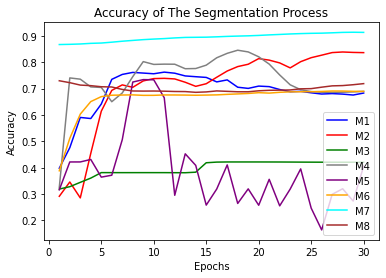

In [76]:
# plot the training and validation accuracy and loss at each epoch
loss = hit1.history['loss']
epochs = range (1, len(loss)+1)
acc1 = hit1.history['accuracy']
acc2 = hit2.history['accuracy']
acc3 = hit3.history['accuracy']
acc4 = hit4.history['accuracy']
acc5 = hit5.history['accuracy']
acc6 = hit6.history['accuracy']
acc7 = hit7.history['accuracy']
acc8 = hit8.history['accuracy']

plt.plot(epochs, acc1, 'blue',label = 'M1')
plt.plot(epochs, acc2, 'red',label = 'M2')
plt.plot(epochs, acc3, 'Green',label = 'M3')
plt.plot(epochs, acc4, 'Gray',label = 'M4')
plt.plot(epochs, acc5, 'Purple',label = 'M5')
plt.plot(epochs, acc6, 'orange',label = 'M6')
plt.plot(epochs, acc7, 'cyan',label = 'M7')
plt.plot(epochs, acc8, 'brown',label = 'M8')

plt.title('Accuracy of The Segmentation Process')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

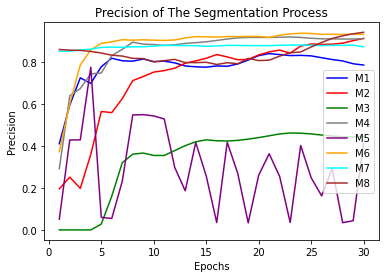

In [77]:
p1 = hit1.history['precision']
p2 = hit2.history['precision_1']
p3 = hit3.history['precision_2']
p4 = hit4.history['precision_3']
p5 = hit5.history['precision_4']
p6 = hit6.history['precision_5']
p7 = hit7.history['precision_6']
p8 = hit8.history['precision_7']

plt.plot(epochs, p1, 'blue',label = 'M1')
plt.plot(epochs, p2, 'red',label = 'M2')
plt.plot(epochs, p3, 'Green',label = 'M3')
plt.plot(epochs, p4, 'Gray',label = 'M4')
plt.plot(epochs, p5, 'Purple',label = 'M5')
plt.plot(epochs, p6, 'orange',label = 'M6')
plt.plot(epochs, p7, 'cyan',label = 'M7')
plt.plot(epochs, p8, 'brown',label = 'M8')

plt.title('Precision of The Segmentation Process')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

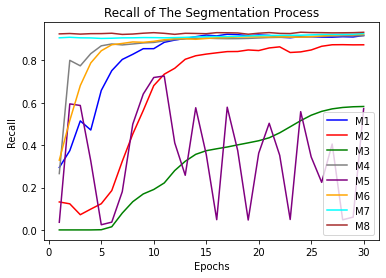

In [78]:
r1 = hit1.history['recall']
r2 = hit2.history['recall_1']
r3 = hit3.history['recall_2']
r4 = hit4.history['recall_3']
r5 = hit5.history['recall_4']
r6 = hit6.history['recall_5']
r7 = hit7.history['recall_6']
r8 = hit8.history['recall_7']

plt.plot(epochs, r1, 'blue',label = 'M1')
plt.plot(epochs, r2, 'red',label = 'M2')
plt.plot(epochs, r3, 'Green',label = 'M3')
plt.plot(epochs, r4, 'Gray',label = 'M4')
plt.plot(epochs, r5, 'Purple',label = 'M5')
plt.plot(epochs, r6, 'orange',label = 'M6')
plt.plot(epochs, r7, 'cyan',label = 'M7')
plt.plot(epochs, r8, 'brown',label = 'M8')

plt.title('Recall of The Segmentation Process')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

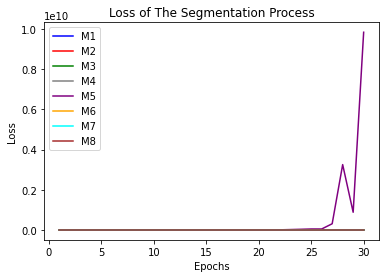

In [79]:
l1 = hit1.history['loss']
l2 = hit2.history['loss']
l3 = hit3.history['loss']
l4 = hit4.history['loss']
l5 = hit5.history['loss']
l6 = hit6.history['loss']
l7 = hit7.history['loss']
l8 = hit8.history['loss']

plt.plot(epochs, l1, 'blue',label = 'M1')
plt.plot(epochs, l2, 'red',label = 'M2')
plt.plot(epochs, l3, 'Green',label = 'M3')
plt.plot(epochs, l4, 'Gray',label = 'M4')
plt.plot(epochs, l5, 'Purple',label = 'M5')
plt.plot(epochs, l6, 'orange',label = 'M6')
plt.plot(epochs, l7, 'cyan',label = 'M7')
plt.plot(epochs, l8, 'brown',label = 'M8')

plt.title('Loss of The Segmentation Process')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###  SAVING MODEL TO PREDICTION ====

In [27]:
model1.save('data/model_save/MTrainM1_RGB_512.hdfs')
model2.save('data/model_save/MTrainM2_RGB_512.hdfs')
model3.save('data/model_save/MTrainM3_RGB_512.hdfs')
model4.save('data/model_save/MTrainM4_RGB_512.hdfs')
model5.save('data/model_save/MTrainM5_RGB_512.hdfs')
model6.save('data/model_save/MTrainM6_RGB_512.hdfs')

INFO:tensorflow:Assets written to: data/model_save/MTrainM1_RGB_512.hdfs/assets
INFO:tensorflow:Assets written to: data/model_save/MTrainM2_RGB_512.hdfs/assets
INFO:tensorflow:Assets written to: data/model_save/MTrainM3_RGB_512.hdfs/assets
INFO:tensorflow:Assets written to: data/model_save/MTrainM4_RGB_512.hdfs/assets
INFO:tensorflow:Assets written to: data/model_save/MTrainM5_RGB_512.hdfs/assets
INFO:tensorflow:Assets written to: data/model_save/MTrainM6_RGB_512.hdfs/assets


/home/m468172/env_maura/lib/python3.6/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [80]:
# model7.save('data/model_save/MTrainM7_RGB_3B3512.hdfs')
# model8.save('data/model_save/MTrainM8_RGB_3B3512.hdfs')

model7.save('data/model_save/MTrainM7_Baru+3RGB_1.hdfs')
model8.save('data/model_save/MTrainM8_Baru+R3RGB_1.hdfs')

INFO:tensorflow:Assets written to: data/model_save/MTrainM7_Baru+3RGB_1.hdfs/assets
INFO:tensorflow:Assets written to: data/model_save/MTrainM8_Baru+R3RGB_1.hdfs/assets


/home/m468172/env_maura/lib/python3.6/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [29]:
#Load Model
m1 = load_model('data/model_save/MTrainM1_RGB_3B3512.hdfs', compile=False)
m2 = load_model('data/model_save/MTrainM2_RGB_3B3512.hdfs', compile=False)
m3 = load_model('data/model_save/MTrainM3_RGB_3B3512.hdfs', compile=False)
m4 = load_model('data/model_save/MTrainM4_RGB_3B3512.hdfs', compile=False)
m5 = load_model('data/model_save/MTrainM5_RGB_3B3512.hdfs', compile=False)
m6 = load_model('data/model_save/MTrainM6_RGB_3B3512.hdfs', compile=False)
# m7 = load_model('data/model_save/MTrainM7_RGB.hdfs', compile=False)


In [81]:
# cp1 = 'training/cpVGG19_Baru+3RGB_PB512.ckpt'
# m7 = load_model('data/model_save/MTrainM7_RGB_3B3512.hdfs', compile=False)
m7 = load_model('data/model_save/MTrainM7_Baru+3RGB_1.hdfs', compile=False)
# cpr1 = tf.train.Checkpoint(model=m7)
# cpr1.restore(cp1).expect_partial()

# cp2 = 'training/cpVGG19_Baru+R3RGB_PB512.ckpt'
# m8 = load_model('data/model_save/MTrainM8_RGB_3B3512.hdfs', compile=False)
m8 = load_model('data/model_save/MTrainM8_Baru+R3RGB_1.hdfs', compile=False)

# cpr2 = tf.train.Checkpoint(model=m8)
# cpr2.restore(cp2).expect_partial()

#### PREDICTION CLASS ###

In [31]:
pr1 = m1.predict(img_array)
pr2 = m2.predict(img_array)
pr3 = m3.predict(img_array)
pr4 = m4.predict(img_array)
pr5 = m5.predict(img_array)
pr6 = m6.predict(img_array)


In [82]:
pr7 = m7.predict(img_array)
pr8 = m8.predict(img_array)

In [63]:
def convert_rgb(mask):
    p0 = (mask[0,:,:,0]>0.5)*255
    p1 = (mask[0,:,:,1]>0.5)*255
    p2 = (mask[0,:,:,2]>0.5)*255
    merge_rgb = cv2.merge([p0,p1,p2])
    return merge_rgb.astype(np.uint8)

def label2BGR(mask):
    """Konversi dari mask ke B,G,R"""
    B = (mask==1)*1*248
    R = (mask==2)*1*248
    G = (mask==3)*1*248
    color_im = cv2.merge([B,G,R])
    return color_im.astype(np.uint8)


(-0.5, 511.5, 511.5, -0.5)

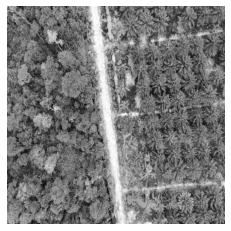

In [34]:
plt.imshow(img_array[0,:,:,0], cmap='gray')
plt.axis('off')

(3040, 4056, 3) (3040, 4056, 3)


(-0.5, 4055.5, 3039.5, -0.5)

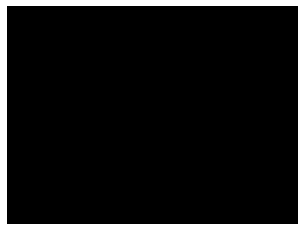

In [35]:
# print(mask)
cmask = label2BGR(mask[:,:,0])
# cmask = convert_rgb(cmask[:,:,0])
cmask = cv2.cvtColor(cmask, cv2.COLOR_BGR2RGB)

print(mask.shape, cmask.shape)
plt.imshow(cmask)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

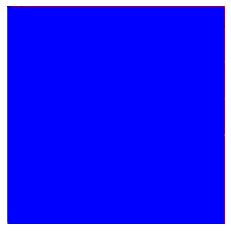

In [36]:
# print(pr1)
pr11 = convert_rgb(pr1)
plt.imshow(pr11[:,:,])
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

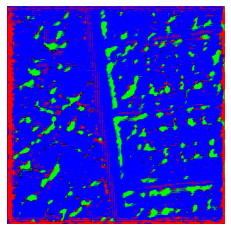

In [37]:
# print(pr2)
pr22 = convert_rgb(pr2)
plt.imshow(pr22[:,:,], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

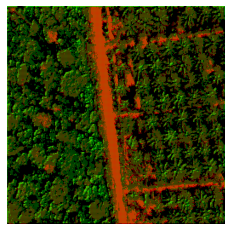

In [38]:
pr33 = convert_rgb(pr3)
plt.imshow(pr33[:,:,])
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

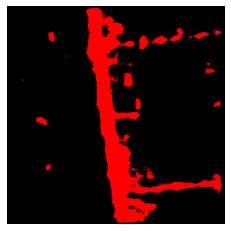

In [39]:
# print(pr4)
pr44 = convert_rgb(pr4)
plt.imshow(pr44[:,:,])
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

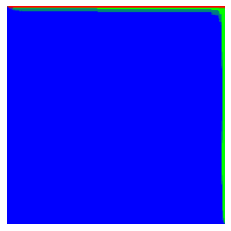

In [40]:
pr55 = convert_rgb(pr5)
plt.imshow(pr55[:,:,])
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

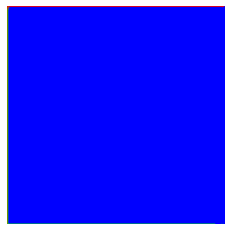

In [41]:
# print(pr6)
pr66 = convert_rgb(pr6)
plt.imshow(pr66[:,:,])
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

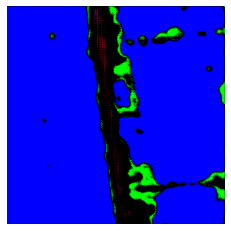

In [83]:
pr77 = convert_rgb(pr7)
plt.imshow(pr77[:,:,])
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

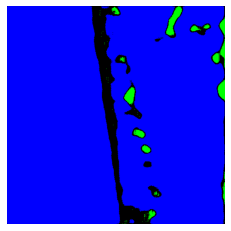

In [84]:
pr88 = convert_rgb(pr8)
plt.imshow(pr88[:,:,])
plt.axis('off')